In [21]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import tensorflow as tf
import numpy as np
from utils import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
tf.reset_default_graph()

In [4]:
np.set_printoptions(linewidth=200)

In [5]:
with tf.device('/cpu:0'):
    x = tf.constant(1., name='x')

    y = tf.constant(2., name='y')
    z = tf.constant(3., name='z')

    c = tf.multiply(tf.add(x, y, name='x_p_y'), z, name='c')
    
    a = tf.get_variable('scalar', initializer=tf.constant(2))

writer = tf.summary.FileWriter('./data/graph', tf.get_default_graph())
with tf.Session()as sess:
    print(sess.run(c))
writer.close()

9.0


In [6]:
data = np.loadtxt('data/weatherHistory.csv', skiprows=1 ,delimiter=',')
# data_X, data_y = load_data ("data/weatherHistory.csv")

In [7]:
tr_X, te_X, tr_y, te_y = train_test_split(data[:,:-1], data[:,[-1]], test_size=.2)
# data_y = data[:,[-1]]

# Linear regression

In [16]:
scaler = StandardScaler()
tr_X = scaler.fit_transform(tr_X)
te_X = scaler.transform(te_X)

In [8]:
num_features = tr_X.shape[1]
w_shape = (num_features, 1)

In [9]:
X = tf.placeholder(shape=(None, num_features), dtype=tf.float32, name='input')
y = tf.placeholder(shape=(None, 1), dtype=tf.float32, name='target')

In [10]:
# theta = tf.get_variable(shape=w_shape, dtype=tf.float32, name='weights', initializer=None)
# b = tf.get_variable(shape=(1,1), dtype=tf.float32, name='bias', initializer=None)
theta = tf.get_variable(shape=w_shape, dtype=tf.float32, name='weights', initializer=tf.zeros_initializer())
b = tf.get_variable(shape=(1,1), dtype=tf.float32, name='bias', initializer=tf.zeros_initializer())

In [11]:
h = tf.matmul(X, theta) + b

loss = tf.reduce_mean((y-h)**2, name='loss')

In [17]:
optimiser = tf.train.GradientDescentOptimizer(learning_rate=.1)
# optimiser = tf.train.AdamOptimizer(learning_rate=.1)

opt = optimiser.minimize(loss)

In [13]:
initialiser = tf.global_variables_initializer()
inits = tf.local_variables_initializer()

In [18]:
epochs = 500
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
#     sess.run(initialiser)
#     sess.run(inits)
#     print(sess.run(tf.report_uninitialized_variables()))
#     print(tf.trainable_variables())
    sess.run(tf.global_variables_initializer())
    t = sess.run(theta)
    print(sess.run(b))
    print(sess.run(theta))
    t1 = sess.run(b)
    print(sess.run(loss, {X: tr_X, y: tr_y}))
    test_loss = []
    train_loss = []
    for i in range(epochs):
        _, tr_loss = sess.run([opt, loss], {X: tr_X, y: tr_y})
        te_loss = sess.run(loss, {X: te_X, y: te_y})
        train_loss += [tr_loss]
        test_loss += [te_loss]
#         print(sess.run(loss, {X: te_X, y: te_y}))
#         print(sess.run(h-y, {X: data_X, y: data_y}).shape)
#         sess.run(optimiser.apply_gradients(optimiser.compute_gradients(loss, {X: data_X, y: data_y})))
#     print(sess.run(tf.report_uninitialized_variables()))
    result = sess.run(loss, {X: tr_X, y: tr_y})
    th0 = sess.run(b)
    tht = sess.run(theta)

[[0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
234.169


In [19]:
print(tht, th0)

[[-6.113933  ]
 [-1.44534   ]
 [ 0.30928013]
 [ 1.863026  ]
 [-0.4460406 ]] [[11.677569]]


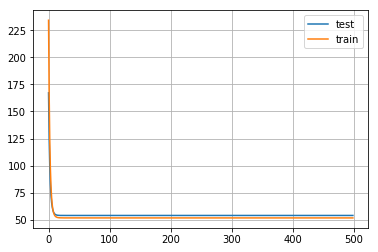

train loss = 51.755047
test loss = 54.022705


In [20]:
num_points = 500
plt.plot(test_loss[:num_points], label='test')
plt.plot(train_loss[:num_points], label='train')
plt.grid()
plt.legend()
plt.show()
print('train loss =', train_loss[-1])
print('test loss =', test_loss[-1])

# Logistic regression

In [126]:
data = np.loadtxt('data/candy.csv', skiprows=1 ,delimiter=',')
# data_X, data_y = load_data ("data/weatherHistory.csv")

In [127]:
tr_X, te_X, tr_y, te_y = train_test_split(data[:,:-1], data[:,[-1]], test_size=.2)
# data_y = data[:,[-1]]

In [187]:
tr_y = tr_y.astype(np.float32)
tr_X = tr_X.astype(np.float32)
te_y = te_y.astype(np.float32)
te_X = te_X.astype(np.float32)

In [159]:
scaler = StandardScaler()
tr_X = scaler.fit_transform(tr_X)
te_X = scaler.transform(te_X)

In [160]:
num_features = tr_X.shape[1]
w_shape = (num_features, 1)

In [301]:
tf.reset_default_graph()

X = tf.placeholder(np.float32, (None, num_features), 'input')
y = tf.placeholder(np.float32, (None, 1), 'label')

weights = tf.get_variable('weights_log', (num_features, 1), tf.float32, initializer=tf.zeros_initializer())

intercept = tf.get_variable('intercept', (1), tf.float32, initializer=tf.zeros_initializer())

logits = tf.matmul(X, weights) + intercept
reg_term = tf.square(tf.nn.l2_loss(weights))
loss = tf.reduce_mean(tf.add(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits), tf.multiply(1., reg_term)), name='loss')

hyp = tf.sigmoid(logits)

preds = tf.round(hyp)

In [302]:
optimiser = tf.train.AdamOptimizer(learning_rate=.01).minimize(loss)

0.6931472
0.41103053


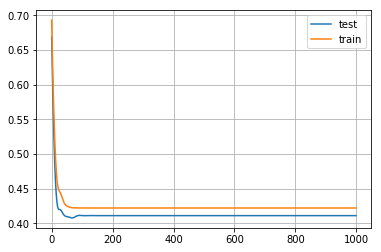

train loss = 0.4220629
test loss = 0.41103053


In [303]:
epochs = 1000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(loss, feed_dict={X: te_X, y: te_y}))
    test_loss = []
    train_loss = []
    for i in range(epochs):
        _, tr_loss = sess.run([optimiser, loss], feed_dict={X: tr_X, y: tr_y})
        te_loss = sess.run(loss, {X: te_X, y: te_y})
        train_loss += [tr_loss]
        test_loss += [te_loss]
    print(sess.run(loss, feed_dict={X: te_X, y: te_y}))
    prd = sess.run(preds, feed_dict={X: te_X, y: te_y})

num_points = epochs
plt.plot(test_loss[:num_points], label='test')
plt.plot(train_loss[:num_points], label='train')
plt.grid()
plt.legend()
plt.show()
print('train loss =', train_loss[-1])
print('test loss =', test_loss[-1])

In [304]:
accuracy_score(te_y, prd)

0.9411764705882353